In [14]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [15]:
# reading and converting color image from RGB to grasyscale image
img = rgb2gray(io.imread(r'C:\Users\Sibusiso Mgidi\Desktop\Digital Image Processing\Assignment 1\imgs\road_low_2.jpg'))

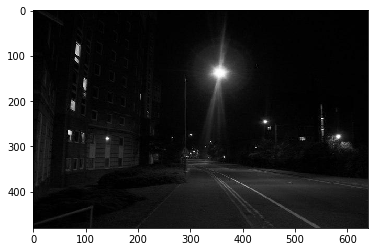

In [16]:
# Plot the original image
plt.imshow(img, aspect = 'auto', cmap = 'gray')

In [17]:
# Function for Ploting an original image histogram
def plot_histogram(img):
    plt.hist(img.ravel(),256,[0,256])
    plt.savefig("original_road_low_2_hist.png")
    plt.show()

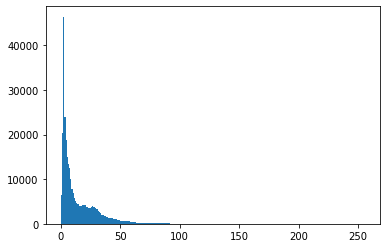

In [18]:
# Original image plot
plot_histogram(img)

In [19]:
# Total number of of rows and columns in an image
n = img.shape[0] * img.shape[1]
[row,column] = img.shapeqx

# One dimensional array of length 256 with values from 0 - 255
image_matrix = np.arange(0,256,1)  
    
# Initialize the array to zeros 
image_matrix[:] = 0
for i in range(0, row):
    for j in range(0, column):
        image_matrix[img[i,j]] += 1
# Frequency
image_matrix
    
# Histogram
pr = image_matrix/(n) #pdf

In [20]:
# calculate cdf(cummulative density function) of gray scale image
cdf_sum = []
cum_sum = 0
for pixel in pr:
    cum_sum = cum_sum + pixel
    cdf_sum.append(cum_sum)  

In [21]:
# cdf * (L- 1)
L = 256 
cdf_sum_with_L = []
for value in cdf_sum:
    element = np.round(value * (L - 1))
    cdf_sum_with_L.append(element)

In [22]:
#Initialize the array to zeros in order to store the tranformed image
outputImg = np.zeros(img.shape).astype('uint8')
for row in range(img.shape[0]):
    for column in range(img.shape[1]):
        i = img[row][column]
        outputImg[row][column]=cdf_sum_with_L[i]

In [23]:
# Function to ploting and saving a tranformed image histogram
def plot_histogram(outputImg):
    plt.hist(outputImg.ravel(),256,[0,256])
    plt.savefig("transformed_road_low_2_hist.png")
    plt.show()

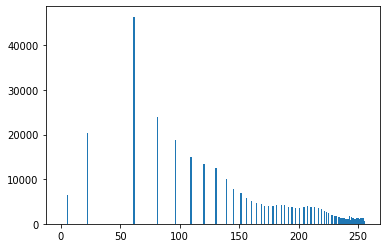

In [24]:
plot_histogram(outputImg)

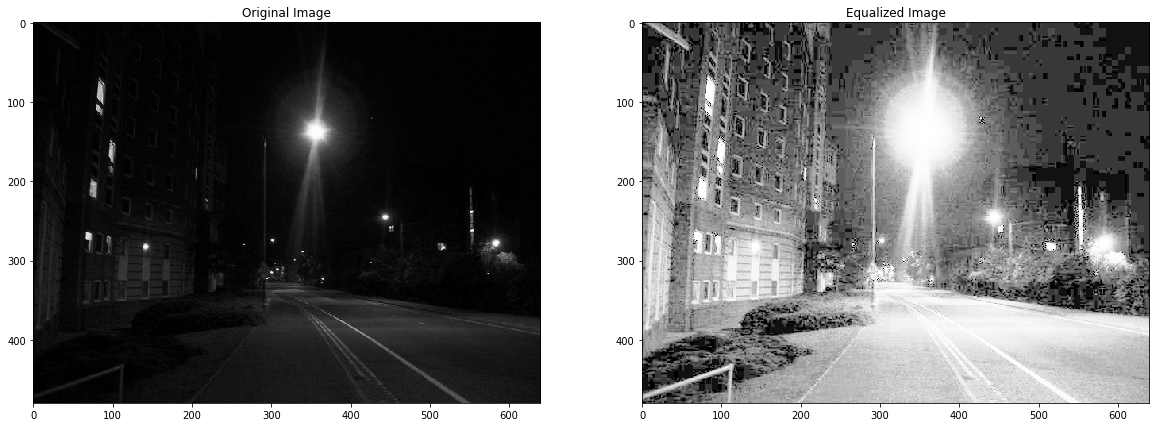

In [25]:
# Plot the original image in comaprison with the equalized image
fig = plt.figure(figsize=(20,20))

# Show original image
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
plt.imshow(img, cmap='gray')

# Histogram equalized images
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Equalized Image")
plt.imshow(outputImg, cmap='gray')

plt.show(block=True)

In [26]:
io.imsave(r'C:\Users\Sibusiso Mgidi\Desktop\Digital Image Processing\Assignment 1\imgs\road_low_2_tranformed.png', outputImg)